# Sentiment Analysis - For Exisiting Members

Develop a sentiment analysis for exisitng members to analyze reviews of members for better user experience and enhancing client ratings. This will help in imporving branding and damage controling measures. 

Analytics Use case (Problem Statement):

With the increasing volume of online patient-generated reviews for various medications, it is crucial to develop effective methods for understanding member sentiment regarding their experiences. These reviews contain valuable insights into product effectiveness, side effects, and overall member satisfaction, which can help healthcare providers, researchers, and pharmaceutical companies improve patient care and make informed decisions.

The challenge is to use sentiment analysis techniques to classify patient reviews into positive, negative, or neutral sentiments. Additionally, the project aims to identify key factors contributing to patient sentiment, such as effectiveness, side effects, and specific conditions being treated. By analyzing the textual data from patient reviews, this study seeks to uncover patterns and trends in patient satisfaction and dissatisfaction with medications, providing deeper insights into drug efficacy and safety.

### Importing Packages and Data

In [276]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.options.display.max_columns = None
pd.options.display.max_rows = None
np.set_printoptions(suppress=True)
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score

In [222]:
# Import dataset from Google Drive
# change dir to your project folder

# from google.colab import drive
# drive.mount('/content/gdrive')

# root_path = '/content/gdrive/MyDrive/Colab Notebooks/DS Projects/Sentiment Analysis/'
root_path = '/Users/sunny/Documents/MyDocs/MyWork/SP_Work/_DS_Py_Work/202410 - Sentiment Analysis/'

df_data = pd.read_csv(root_path+'drugsComTest_raw.csv')

In [223]:
df_data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [224]:
df_data.isnull().any()

uniqueID       False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [225]:
df_data.isnull().sum()

uniqueID         0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64

### Data Visualisation

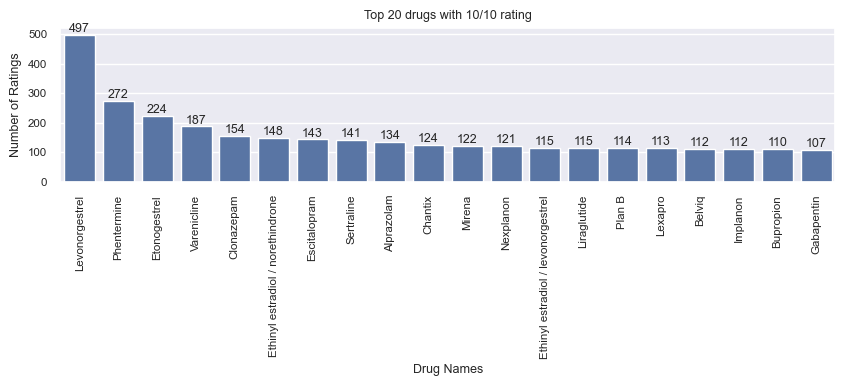

In [226]:

sns.set(font_scale = 0.75, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [10, 2]

rating = dict(df_data.loc[df_data.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

for i in sns_rating.containers:
    sns_rating.bar_label(i,)

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.show()

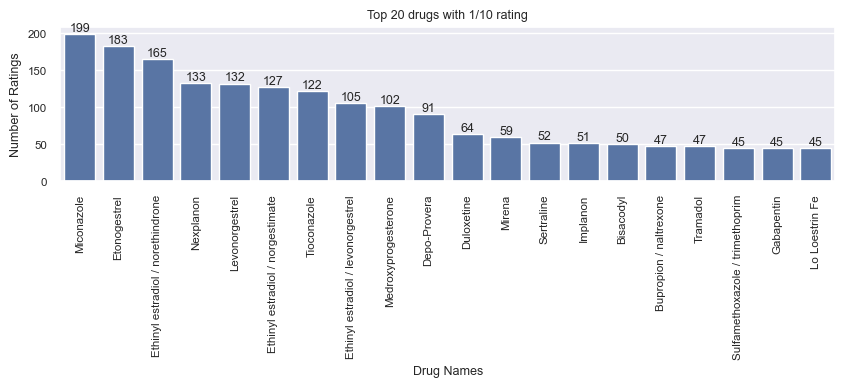

In [227]:
sns.set(font_scale = 0.75, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [10, 2]

rating = dict(df_data.loc[df_data.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

for i in sns_rating.containers:
    sns_rating.bar_label(i,)

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.show()

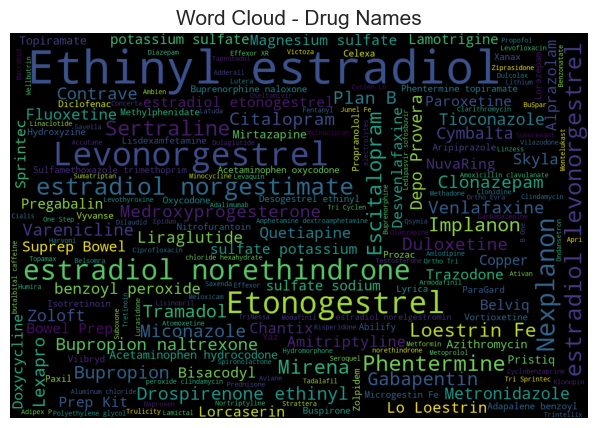

In [228]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords = stopwords, width = 1200, height = 800).generate(str(df_data['drugName']))

plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Word Cloud - Drug Names', fontsize = 15)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [229]:
temp = df_data.groupby('rating').count()['review'].reset_index().sort_values(by='review',ascending=False)
temp.style.background_gradient(cmap='Purples')

,rating,review
9,10,17016
8,9,9177
0,1,7299
7,8,6156
6,7,3091
4,5,2710
1,2,2334
2,3,2205
5,6,2119
3,4,1659


In [230]:
df_data['date'] = pd.to_datetime(df_data['date'], errors = 'coerce')
df_data['Year'] = df_data['date'].dt.year
df_data['month'] = df_data['date'].dt.month
df_data['day'] = df_data['date'].dt.day

In [231]:
df_data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Year,month,day
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22,2012,2,28
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,2009-05-17,17,2009,5,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,2017-09-29,3,2017,9,29
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,2017-03-05,35,2017,3,5
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,2015-10-22,4,2015,10,22


##  Data Cleaning & Tokenization

In [232]:
lower = df_data.review.str.lower()
pattern_remove = lower.str.replace("&#039;", "")
special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
df_data['review_clean'] = multiw_remove.str.replace(r'\.{2,}', ' ')

In [233]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df_data['review_clean'] = df_data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

[nltk_data] Downloading package stopwords to /Users/sunny/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [234]:
Snow_ball = SnowballStemmer("english")
df_data['review_clean'] = df_data['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [235]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol
df_data['sentiment1'] = sentiment(df_data['review'])
df_data['sentiment_clean1'] = sentiment(df_data['review_clean'])

In [236]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   uniqueID          53766 non-null  int64         
 1   drugName          53766 non-null  object        
 2   condition         53471 non-null  object        
 3   review            53766 non-null  object        
 4   rating            53766 non-null  int64         
 5   date              53766 non-null  datetime64[ns]
 6   usefulCount       53766 non-null  int64         
 7   Year              53766 non-null  int32         
 8   month             53766 non-null  int32         
 9   day               53766 non-null  int32         
 10  review_clean      53766 non-null  object        
 11  sentiment1        53766 non-null  float64       
 12  sentiment_clean1  53766 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(3), int64(3), object(4)
memory usage

In [237]:
df_data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Year,month,day,review_clean,sentiment1,sentiment_clean1
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22,2012,2,28,"""ive tri antidepress year (citalopram, fluoxet...",0.000000,-0.150000
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,2009-05-17,17,2009,5,17,"""mi son crohn diseas done well asacol. complai...",0.566667,-0.300000
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,2017-09-29,3,2017,9,29,"""quick reduct symptoms""",0.333333,0.333333
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,2017-03-05,35,2017,3,5,"""contrav combin drug use alcohol, smoking, opi...",0.139063,0.700000
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,2015-10-22,4,2015,10,22,"""i birth control one cycle. read review type s...",0.260926,0.266361


In [238]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = sia.polarity_scores(i)
        pol.append(analysis['compound'])
    return pol
df_data['sentiment2'] = sentiment(df_data['review'])
df_data['sentiment_clean2'] = sentiment(df_data['review_clean'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sunny/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [239]:
df_data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Year,month,day,review_clean,sentiment1,sentiment_clean1,sentiment2,sentiment_clean2
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22,2012,2,28,"""ive tri antidepress year (citalopram, fluoxet...",0.000000,-0.150000,-0.4596,0.8762
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,2009-05-17,17,2009,5,17,"""mi son crohn diseas done well asacol. complai...",0.566667,-0.300000,0.0736,-0.0258
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,2017-09-29,3,2017,9,29,"""quick reduct symptoms""",0.333333,0.333333,0.0000,0.0000
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,2017-03-05,35,2017,3,5,"""contrav combin drug use alcohol, smoking, opi...",0.139063,0.700000,0.7086,0.4468
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,2015-10-22,4,2015,10,22,"""i birth control one cycle. read review type s...",0.260926,0.266361,0.9559,0.9543


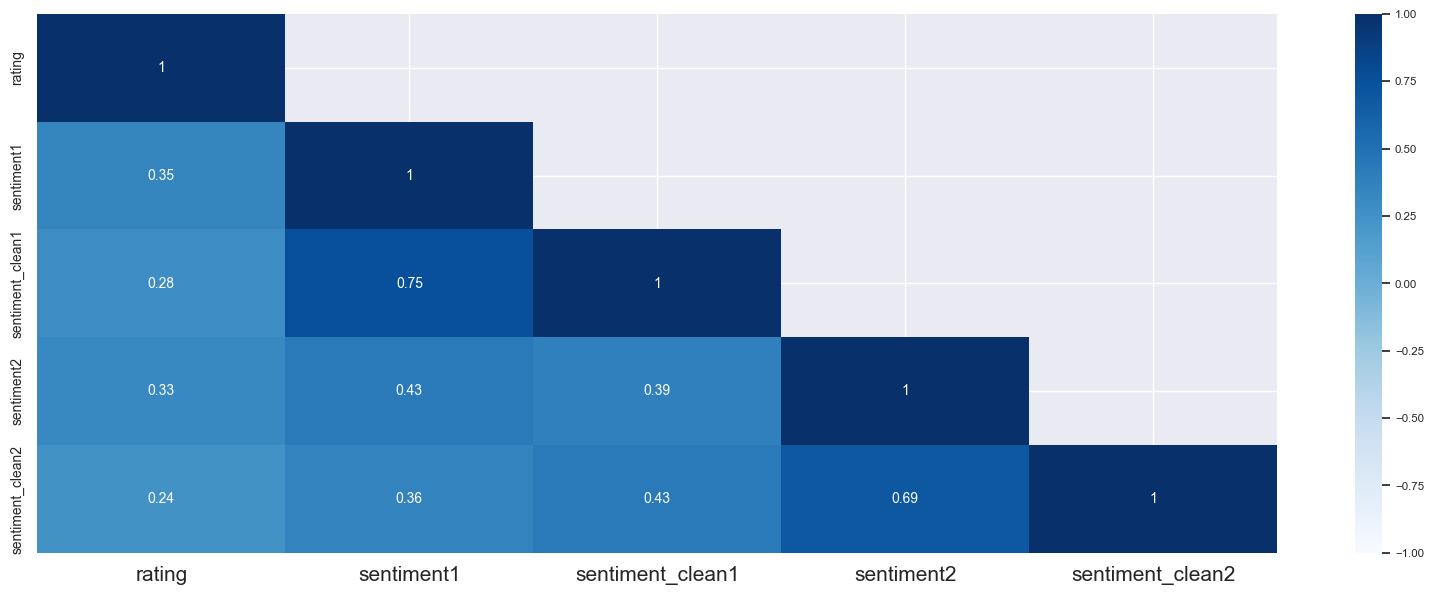

In [240]:
cols = ['rating','sentiment1','sentiment_clean1','sentiment2','sentiment_clean2']
df_corr = df_data[cols]
df_corr = df_corr.corr()
plt.figure(figsize = (20,7))
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask, k = 1)] = True
sns.heatmap(df_corr, cmap = 'Blues', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 10}, mask = mask)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 10)
plt.show()


In [241]:
# Define the categorization function
def categorize_polarity(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# df_data['F_Sentiment'] = df_data['sentiment1'].apply(categorize_polarity)
df_data['F_Sentiment'] = df_data['sentiment_clean2'].apply(categorize_polarity)

In [242]:
df_data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Year,month,day,review_clean,sentiment1,sentiment_clean1,sentiment2,sentiment_clean2,F_Sentiment
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22,2012,2,28,"""ive tri antidepress year (citalopram, fluoxet...",0.000000,-0.150000,-0.4596,0.8762,Positive
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,2009-05-17,17,2009,5,17,"""mi son crohn diseas done well asacol. complai...",0.566667,-0.300000,0.0736,-0.0258,Negative
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,2017-09-29,3,2017,9,29,"""quick reduct symptoms""",0.333333,0.333333,0.0000,0.0000,Neutral
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,2017-03-05,35,2017,3,5,"""contrav combin drug use alcohol, smoking, opi...",0.139063,0.700000,0.7086,0.4468,Positive
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,2015-10-22,4,2015,10,22,"""i birth control one cycle. read review type s...",0.260926,0.266361,0.9559,0.9543,Positive


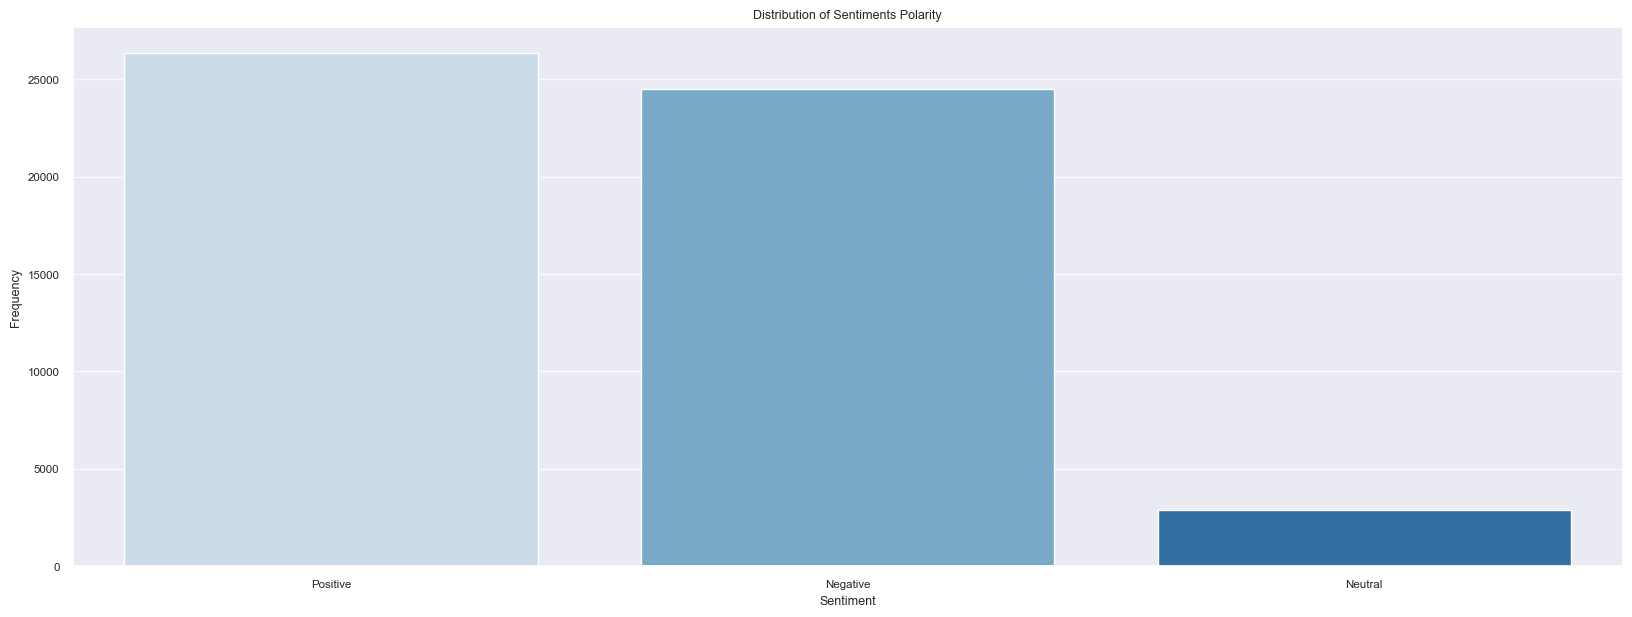

In [243]:
df_freq = df_data['F_Sentiment']

plt.figure(figsize=(20, 7))
sns.countplot(x=df_freq, palette='Blues')
plt.title('Distribution of Sentiments Polarity')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [244]:
temp = df_data.groupby('F_Sentiment').count()['review_clean'].reset_index().sort_values(by='review_clean',ascending=False)
temp.style.background_gradient(cmap='Purples')

,F_Sentiment,review_clean
2,Positive,26350
0,Negative,24514
1,Neutral,2902


In [245]:
# from plotly import graph_objs as go
# fig = go.Figure(go.Funnelarea(
#     text = temp.F_Sentiment,
#     values = temp.review,
#     title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
#     ))
# fig.show()

## Most common words sentiments Wise

In [246]:
Positive_sent = df_data[df_data['F_Sentiment']=='Positive']
Negative_sent = df_data[df_data['F_Sentiment']=='Negative']
Neutral_sent = df_data[df_data['F_Sentiment']=='Neutral']


In [247]:
print(df_data.shape)
print(Positive_sent.shape)
print(Negative_sent.shape)
print(Neutral_sent.shape)

(53766, 16)
(26350, 16)
(24514, 16)
(2902, 16)


In [248]:
import re
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [249]:
Positive_sent['review_clean'] = Positive_sent['review_clean'].apply(lambda x:clean_text(x))
Negative_sent['review_clean'] = Negative_sent['review_clean'].apply(lambda x:clean_text(x))
Neutral_sent['review_clean'] = Neutral_sent['review_clean'].apply(lambda x:clean_text(x))

In [250]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]

In [251]:
def Most_Common_Words(df, var):
    df['temp_list'] = df[var].apply(lambda x:str(x).split())
    df['temp_list'] = df['temp_list'].apply(lambda x:remove_stopword(x))
    top = Counter([item for sublist in df['temp_list'] for item in sublist])
    temp = pd.DataFrame(top.most_common(10))
    temp.columns = ['Common_words','count']
    return temp

In [252]:
Most_Common_Words(df_data, 'review_clean').style.background_gradient(cmap='Blues')

,Common_words,count
0,take,31842
1,"""i",23160
2,day,22243
3,get,19209
4,start,18109
5,side,17260
6,im,16991
7,feel,16929
8,month,16475
9,work,15579


In [253]:
Most_Common_Words(Positive_sent, 'review_clean').style.background_gradient(cmap='Greens')

,Common_words,count
0,take,15460
1,day,13576
2,get,9810
3,work,9748
4,month,9592
5,im,9556
6,start,9171
7,feel,8970
8,year,8729
9,side,8669


In [254]:
Most_Common_Words(Negative_sent, 'review_clean').style.background_gradient(cmap='Reds')

,Common_words,count
0,take,16020
1,day,14176
2,pain,13043
3,start,9307
4,get,9207
5,im,9037
6,month,8961
7,side,8360
8,week,8180
9,feel,7965


In [255]:
Most_Common_Words(df=Neutral_sent, var='review').style.background_gradient(cmap='coolwarm')

,Common_words,count
0,I,3098
1,"""I",817
2,side,458
3,taking,413
4,take,289
5,It,250
6,2,244
7,day,242
8,years,242
9,started,235


## Label Encoding

In [262]:
class MultiColumnLabelEncoder:

    def __init__(self, columns=None):
        self.columns = columns # array of column names to encode

    def fit(self, X, y=None):
        self.encoders = {}
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            self.encoders[col] = LabelEncoder().fit(X[col])
        return self

    def transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].transform(X[col])
        return output

    def fit_transform(self, X, y=None):
        return self.fit(X,y).transform(X)

    def inverse_transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].inverse_transform(X[col])
        return output

In [256]:
df_data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Year,month,day,review_clean,sentiment1,sentiment_clean1,sentiment2,sentiment_clean2,F_Sentiment,temp_list
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22,2012,2,28,"""ive tri antidepress year (citalopram, fluoxet...",0.000000,-0.150000,-0.4596,0.8762,Positive,"[""ive, tri, antidepress, year, (citalopram,, f..."
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,2009-05-17,17,2009,5,17,"""mi son crohn diseas done well asacol. complai...",0.566667,-0.300000,0.0736,-0.0258,Negative,"[""mi, son, crohn, diseas, done, well, asacol.,..."
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,2017-09-29,3,2017,9,29,"""quick reduct symptoms""",0.333333,0.333333,0.0000,0.0000,Neutral,"[""quick, reduct, symptoms""]"
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,2017-03-05,35,2017,3,5,"""contrav combin drug use alcohol, smoking, opi...",0.139063,0.700000,0.7086,0.4468,Positive,"[""contrav, combin, drug, use, alcohol,, smokin..."
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,2015-10-22,4,2015,10,22,"""i birth control one cycle. read review type s...",0.260926,0.266361,0.9559,0.9543,Positive,"[""i, birth, control, one, cycle., read, review..."


In [258]:
df_data.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'Year', 'month', 'day', 'review_clean', 'sentiment1',
       'sentiment_clean1', 'sentiment2', 'sentiment_clean2', 'F_Sentiment',
       'temp_list'],
      dtype='object')

In [269]:
columns = ['drugName', 'condition', 'rating', 'usefulCount', 'F_Sentiment']
df_filter1 = df_data[columns]
df_filter1.head()

,drugName,condition,rating,usefulCount,F_Sentiment
0,Mirtazapine,Depression,10,22,Positive
1,Mesalamine,"Crohn's Disease, Maintenance",8,17,Negative
2,Bactrim,Urinary Tract Infection,9,3,Neutral
3,Contrave,Weight Loss,9,35,Positive
4,Cyclafem 1 / 35,Birth Control,9,4,Positive


In [270]:
multi = MultiColumnLabelEncoder(columns=['drugName', 'condition', 'F_Sentiment'])
df_transform = multi.fit_transform(df_filter1)
df_transform.head()

,drugName,condition,rating,usefulCount,F_Sentiment
0,1561,201,10,22,2
1,1489,185,8,17,0
2,294,656,9,3,1
3,593,676,9,35,2
4,622,122,9,4,2


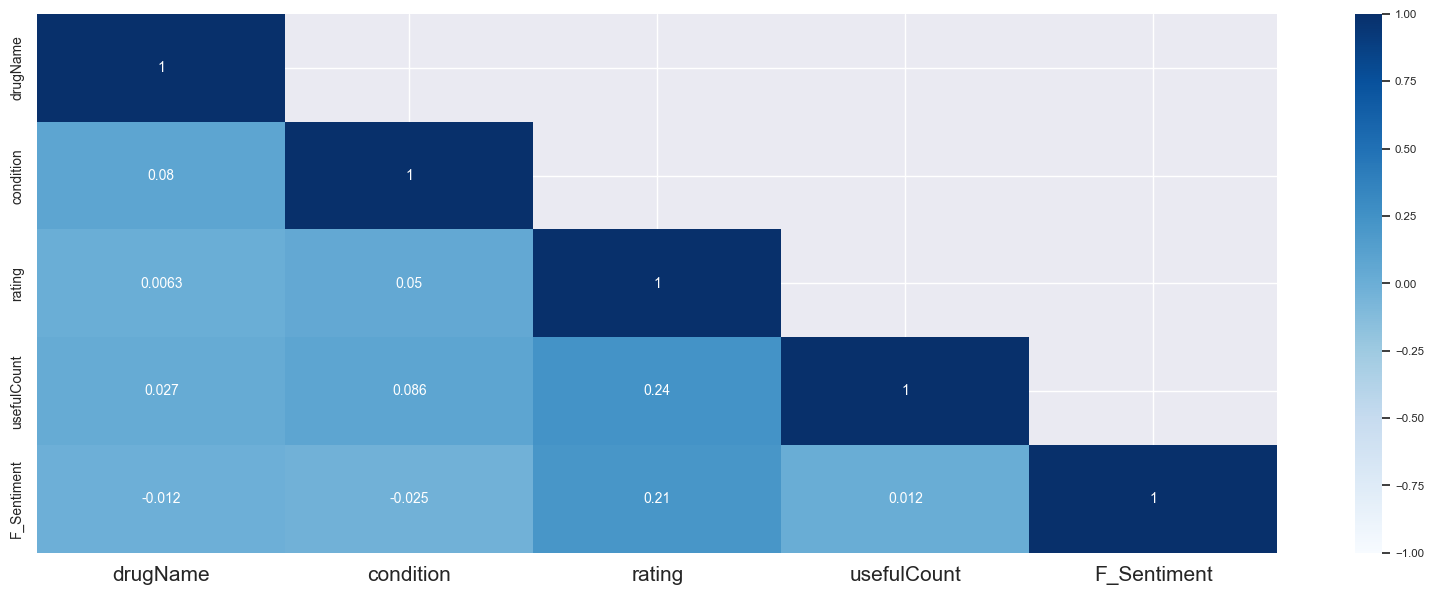

In [271]:
df_corr = df_transform.corr()
plt.figure(figsize = (20,7))
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask, k = 1)] = True
sns.heatmap(df_corr, cmap = 'Blues', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 10}, mask = mask)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 10)
plt.show()

In [294]:
cols = ['Model','Accuracy %','Precision %','Recall %','F1 %']
results_tab = pd.DataFrame(columns = cols)

class classification_defs():

  def __init__(self, model_name, acc_score, pre_score, rec_score, f1_score):
      self.model_name = model_name
      self.acc_score = acc_score
      self.pre_score = pre_score
      self.rec_score = rec_score
      self.f1_score = f1_score
      

  def tablulate_results(self):
    results = pd.Series({
                    'Model': self.model_name,
                    'Accuracy %': round(self.acc_score * 100, 2),
                    'Precision %': round(self.pre_score * 100, 2),
                    'Recall %': round(self.rec_score * 100, 2),
                    'F1 %': round(self.f1_score * 100, 2)
                    })
    return results.to_frame().T

In [289]:
X = df_transform[['drugName', 'condition', 'rating', 'usefulCount']]
Y = df_transform[['F_Sentiment']]

In [280]:
# Splitting data into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=33)

In [284]:
print ("Main set size  :", df_transform.shape)
print ("Train set size :", X_train.shape)
print ("Test set size  :", X_test.shape)

Main set size  : (53766, 5)
Train set size : (43012, 4)
Test set size  : (10754, 4)


In [304]:
# Light GBM
from lightgbm import LGBMClassifier

clf = LGBMClassifier(n_estimators=10000, learning_rate=0.10, num_leaves=30, subsample=0.9,
    max_depth=7, reg_alpha=0.1, reg_lambda=0.1, min_split_gain=0.01, min_child_weight=2,
    silent=-1, verbose=-1,
)

LGBM = clf.fit(X_train, Y_train)
Y_pred = LGBM.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted') 
recall = recall_score(Y_test, Y_pred, average='weighted')        
f1 = f1_score(Y_test, Y_pred, average='weighted')                

print('Accuracy : ', accuracy)
print("Precision: ", precision)
print("Recall   : ", recall)
print("F1 Score : ", f1)

Accuracy :  0.5816440394271899
Precision:  0.5603417664021356
Recall   :  0.5816440394271899
F1 Score :  0.5673586118781908


In [295]:
Model_Obj = classification_defs('Light GBM             ', accuracy, precision, recall, f1)
results_tab = pd.concat([results_tab, Model_Obj.tablulate_results()], ignore_index=True)
results_tab

,Model,Accuracy %,Precision %,Recall %,F1 %
0,Light GBM,58.16,56.03,58.16,56.74


In [296]:
# ANN Neural Networks
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=200, random_state=1)

model = ann.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted') 
recall = recall_score(Y_test, Y_pred, average='weighted')        
f1 = f1_score(Y_test, Y_pred, average='weighted')                

print('Accuracy : ', accuracy)
print("Precision: ", precision)
print("Recall   : ", recall)
print("F1 Score : ", f1)


Accuracy :  0.543146736098196
Precision:  0.522053471865384
Recall   :  0.543146736098196
F1 Score :  0.5245767403269757


In [297]:
Model_Obj = classification_defs('ANN Model', accuracy, precision, recall, f1)
results_tab = pd.concat([results_tab, Model_Obj.tablulate_results()], ignore_index=True)
results_tab

,Model,Accuracy %,Precision %,Recall %,F1 %
0,Light GBM,58.16,56.03,58.16,56.74
1,ANN Model,54.31,52.21,54.31,52.46


In [298]:
## DecisionTreeClassifier - Gini
from sklearn.tree import DecisionTreeClassifier

DT_gini = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=1)

model = DT_gini.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted') 
recall = recall_score(Y_test, Y_pred, average='weighted')        
f1 = f1_score(Y_test, Y_pred, average='weighted')                

print('Accuracy : ', accuracy)
print("Precision: ", precision)
print("Recall   : ", recall)
print("F1 Score : ", f1)

Accuracy :  0.5176678445229682
Precision:  0.518560370192662
Recall   :  0.5176678445229682
F1 Score :  0.5178592268300813


In [299]:
Model_Obj = classification_defs('DecisionTree - Gini', accuracy, precision, recall, f1)
results_tab = pd.concat([results_tab, Model_Obj.tablulate_results()], ignore_index=True)
results_tab

,Model,Accuracy %,Precision %,Recall %,F1 %
0,Light GBM,58.16,56.03,58.16,56.74
1,ANN Model,54.31,52.21,54.31,52.46
2,DecisionTree - Gini,51.77,51.86,51.77,51.79


In [300]:
## DecisionTreeClassifier - Entropy
from sklearn.tree import DecisionTreeClassifier

DT_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=1)

model = DT_entropy.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted') 
recall = recall_score(Y_test, Y_pred, average='weighted')        
f1 = f1_score(Y_test, Y_pred, average='weighted')                

print('Accuracy : ', accuracy)
print("Precision: ", precision)
print("Recall   : ", recall)
print("F1 Score : ", f1)

Accuracy :  0.5093918541937884
Precision:  0.5098274431011002
Recall   :  0.5093918541937884
F1 Score :  0.5093162392381352


In [301]:
Model_Obj = classification_defs('DecisionTree - Entropy', accuracy, precision, recall, f1)
results_tab = pd.concat([results_tab, Model_Obj.tablulate_results()], ignore_index=True)
results_tab

,Model,Accuracy %,Precision %,Recall %,F1 %
0,Light GBM,58.16,56.03,58.16,56.74
1,ANN Model,54.31,52.21,54.31,52.46
2,DecisionTree - Gini,51.77,51.86,51.77,51.79
3,DecisionTree - Entropy,50.94,50.98,50.94,50.93


In [302]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=1)

model = RF.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted') 
recall = recall_score(Y_test, Y_pred, average='weighted')        
f1 = f1_score(Y_test, Y_pred, average='weighted')                

print('Accuracy : ', accuracy)
print("Precision: ", precision)
print("Recall   : ", recall)
print("F1 Score : ", f1)

Accuracy :  0.5506788171843036
Precision:  0.534487793455948
Recall   :  0.5506788171843036
F1 Score :  0.5412970907078385


In [303]:
Model_Obj = classification_defs('Random Forest', accuracy, precision, recall, f1)
results_tab = pd.concat([results_tab, Model_Obj.tablulate_results()], ignore_index=True)
results_tab

,Model,Accuracy %,Precision %,Recall %,F1 %
0,Light GBM,58.16,56.03,58.16,56.74
1,ANN Model,54.31,52.21,54.31,52.46
2,DecisionTree - Gini,51.77,51.86,51.77,51.79
3,DecisionTree - Entropy,50.94,50.98,50.94,50.93
4,Random Forest,55.07,53.45,55.07,54.13


In [305]:
model = LGBM